In [18]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#get original data
videos = pd.read_json('./Data/video_metadata.jsonl',lines=True,encoding='utf-8')
with open('./Data/categories.json') as file:
    categories = json.load(file)
channels = pd.read_json('./Data/channel_metadata.jsonl',lines=True,encoding='utf-8')
#comments = pd.read_json('./Data/comments.jsonl',lines=True,encoding='utf-8').drop(columns='comment')

In [20]:
category_dict = {i['id']:i['snippet']['title'] for i in categories}

In [26]:
df = pd.merge(comments,videos[['channelTitle','videoId','category']],on='videoId')

In [27]:
len(df[df['category']==1])

355435

In [23]:
#get total number of comments
num_comments = 0
category_comments={}

In [27]:
#get data from channels
videos = pd.read_json('./Data/complete_videos_metadata.jsonl',lines=True,encoding='utf-8')
for chunk in pd.read_json('./Data/complete_comments.jsonl',encoding='utf-8',chunksize=10**5,lines=True):
    num_comments+=len(chunk)
    for category in category_dict.keys():
        if category not in category_comments:
            category_comments[category] = 0
        category_comments[category] += len(chunk[chunk['category']==int(category)])

In [28]:
num_comments

77708323

In [15]:
videos.loc[videos['category']=='from_channel','category'] = np.nan

In [16]:
videos.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,category,viewCount,likeCount,favoriteCount,commentCount
count,21110.0,20213.0,20493.0,21109.0,20227.0
mean,18.8,20428025.4,323321.2,0.0,7437.0
std,8.8,141456907.8,1342708.9,0.0,138445.0
min,1.0,0.0,0.0,0.0,0.0
25%,15.0,259267.0,1565.0,0.0,68.0
50%,22.0,1157207.0,11401.0,0.0,604.0
75%,26.0,8267385.0,91575.0,0.0,2906.5
max,29.0,13541562206.0,41596250.0,0.0,15898558.0


In [92]:
len(videos)

30850

In [87]:
def get_category_latex_table(videos,comment_stats):
    table={}
    for category,gb in videos.groupby('category'):
        row = f"\\textbf{{{category_dict[str(category)]}}} & "
        row += str(len(gb)) + ' & '
        row += gb.describe().apply(lambda s: s.apply('{0:,.1f}'.format)).loc['mean','viewCount'] + ' & '
        row += gb.describe().apply(lambda s: s.apply('{0:,.1f}'.format)).loc['mean','likeCount'] + ' & '
        row += gb.describe().apply(lambda s: s.apply('{0:,.1f}'.format)).loc['mean','commentCount'] + ' & '
        table[str(category)]=row
    for category in comment_stats:
        try:
            table[str(category)] += str(comment_stats[category])
        except:
            pass
    return ' \\\\\n'.join(table.values())

In [88]:
print(get_category_latex_table(videos,category_comments))

\textbf{Film & Animation} & 761 & 37585896.3 & 540576.7 & 6516.8 & 355435 \\
\textbf{Autos & Vehicles} & 788 & 9717114.9 & 149138.8 & 3154.1 & 868182 \\
\textbf{Music} & 896 & 136178871.3 & 1179303.5 & 73507.8 & 482107 \\
\textbf{Pets & Animals} & 619 & 28670651.8 & 677213.3 & 6583.9 & 1730415 \\
\textbf{Sports} & 443 & 19468214.5 & 416288.7 & 4993.4 & 211560 \\
\textbf{Travel & Events} & 669 & 15421337.2 & 265574.2 & 3863.2 & 1409280 \\
\textbf{Gaming} & 804 & 20786682.8 & 428010.2 & 12106.7 & 3058454 \\
\textbf{People & Blogs} & 1095 & 33628145.0 & 999734.4 & 10432.3 & 191427 \\
\textbf{Comedy} & 443 & 57723686.7 & 1649679.2 & 12372.2 & 2032064 \\
\textbf{Entertainment} & 894 & 48809864.1 & 724302.9 & 13440.0 & 152138 \\
\textbf{News & Politics} & 478 & 17292601.4 & 219511.9 & 11191.3 & 1592507 \\
\textbf{Howto & Style} & 775 & 26762854.9 & 641112.8 & 6179.2 & 1407317 \\
\textbf{Education} & 714 & 34807724.9 & 282887.6 & 6680.7 & 163101 \\
\textbf{Science & Technology} & 705 & 149518

In [18]:
#get stats for each category
for category,gb in videos.groupby('category'):
    print(category_dict[str(category)])
    display(gb.describe().apply(lambda s: s.apply('{0:.1f}'.format)))

Film & Animation


,category,viewCount,likeCount,favoriteCount,commentCount
count,732.0,729.0,721.0,732.0,716.0
mean,1.0,1344989.5,9996.8,0.0,386.5
std,0.0,6466421.0,30390.4,0.0,1239.5
min,1.0,0.0,1.0,0.0,0.0
25%,1.0,25397.0,181.0,0.0,4.8
50%,1.0,137598.0,1229.0,0.0,46.0
75%,1.0,498142.0,7288.0,0.0,256.5
max,1.0,120240821.0,463178.0,0.0,19414.0


Autos & Vehicles


,category,viewCount,likeCount,favoriteCount,commentCount
count,805.0,805.0,795.0,805.0,794.0
mean,2.0,794170.9,10150.1,0.0,697.2
std,0.0,2551004.3,31357.2,0.0,1559.0
min,2.0,4.0,0.0,0.0,0.0
25%,2.0,179058.0,1144.5,0.0,52.2
50%,2.0,294496.0,2906.0,0.0,224.5
75%,2.0,617008.0,8918.5,0.0,693.0
max,2.0,35421087.0,550640.0,0.0,23366.0


Music


,category,viewCount,likeCount,favoriteCount,commentCount
count,754.0,327.0,722.0,753.0,742.0
mean,10.0,1377904.4,12592.4,0.0,501.7
std,0.0,9934087.2,122137.8,0.0,2568.4
min,10.0,1177.0,0.0,0.0,0.0
25%,10.0,23857.0,2.0,0.0,0.0
50%,10.0,174435.0,195.5,0.0,11.5
75%,10.0,503775.5,2556.0,0.0,126.8
max,10.0,160296800.0,3160352.0,0.0,42962.0


Pets & Animals


,category,viewCount,likeCount,favoriteCount,commentCount
count,800.0,800.0,788.0,800.0,756.0
mean,15.0,10796886.1,233298.2,0.0,1574.4
std,0.0,53638780.6,1379920.3,0.0,4250.2
min,15.0,854.0,4.0,0.0,0.0
25%,15.0,188780.8,1775.2,0.0,82.8
50%,15.0,431597.0,5264.5,0.0,290.5
75%,15.0,1598319.8,17607.0,0.0,1091.8
max,15.0,836727494.0,23078336.0,0.0,42362.0


Sports


,category,viewCount,likeCount,favoriteCount,commentCount
count,584.0,368.0,568.0,584.0,553.0
mean,17.0,633059.2,10770.9,0.0,365.8
std,0.0,4243736.1,139663.5,0.0,771.3
min,17.0,173.0,0.0,0.0,0.0
25%,17.0,62914.0,9.0,0.0,1.0
50%,17.0,204061.0,1397.0,0.0,128.0
75%,17.0,389701.8,5569.8,0.0,418.0
max,17.0,79407908.0,3321832.0,0.0,9549.0


Travel & Events


,category,viewCount,likeCount,favoriteCount,commentCount
count,791.0,791.0,771.0,791.0,776.0
mean,19.0,2650174.5,55433.6,0.0,1345.3
std,0.0,9190901.9,310165.0,0.0,3860.2
min,19.0,1179.0,2.0,0.0,0.0
25%,19.0,187142.0,1444.5,0.0,64.5
50%,19.0,485416.0,5000.0,0.0,279.5
75%,19.0,1561407.0,17093.0,0.0,1035.5
max,19.0,125506631.0,4593382.0,0.0,57804.0


Gaming


,category,viewCount,likeCount,favoriteCount,commentCount
count,792.0,785.0,784.0,792.0,779.0
mean,20.0,5168923.8,73193.2,0.0,2467.0
std,0.0,26068352.8,383189.8,0.0,7792.2
min,20.0,3680.0,131.0,0.0,0.0
25%,20.0,206279.0,4453.8,0.0,317.5
50%,20.0,432768.0,9910.0,0.0,818.0
75%,20.0,1192013.0,24616.0,0.0,1960.5
max,20.0,349755693.0,7093652.0,0.0,95513.0


People & Blogs


,category,viewCount,likeCount,favoriteCount,commentCount
count,595.0,485.0,570.0,595.0,570.0
mean,22.0,1820116.4,26741.3,0.0,301.0
std,0.0,9200511.6,167681.9,0.0,894.1
min,22.0,0.0,0.0,0.0,0.0
25%,22.0,28.0,0.0,0.0,0.0
50%,22.0,159738.0,72.0,0.0,6.5
75%,22.0,438659.0,8985.0,0.0,171.0
max,22.0,120187363.0,2709514.0,0.0,8818.0


Comedy


,category,viewCount,likeCount,favoriteCount,commentCount
count,780.0,779.0,773.0,780.0,777.0
mean,23.0,4878153.6,127701.7,0.0,1821.5
std,0.0,30861703.1,954910.8,0.0,3511.0
min,23.0,5606.0,12.0,0.0,0.0
25%,23.0,221884.5,5685.0,0.0,295.0
50%,23.0,545061.0,12567.0,0.0,777.0
75%,23.0,1357368.0,30398.0,0.0,1756.0
max,23.0,426691322.0,15327182.0,0.0,34138.0


Entertainment


,category,viewCount,likeCount,favoriteCount,commentCount
count,273.0,272.0,243.0,273.0,269.0
mean,24.0,1668656.7,22650.8,0.0,579.5
std,0.0,16888062.0,131365.8,0.0,834.4
min,24.0,5024.0,15.0,0.0,0.0
25%,24.0,85344.2,1890.0,0.0,100.0
50%,24.0,257169.0,5365.0,0.0,311.0
75%,24.0,455494.0,13011.0,0.0,705.0
max,24.0,274430537.0,1854539.0,0.0,5941.0


News & Politics


,category,viewCount,likeCount,favoriteCount,commentCount
count,785.0,785.0,769.0,785.0,744.0
mean,25.0,764287.5,8972.1,0.0,1521.9
std,0.0,2226589.3,32723.3,0.0,3015.2
min,25.0,319.0,5.0,0.0,0.0
25%,25.0,165088.0,1095.0,0.0,177.5
50%,25.0,284850.0,3295.0,0.0,642.5
75%,25.0,601170.0,7832.0,0.0,1550.5
max,25.0,32817244.0,705330.0,0.0,32442.0


Howto & Style


,category,viewCount,likeCount,favoriteCount,commentCount
count,760.0,712.0,707.0,760.0,747.0
mean,26.0,3568454.6,39680.2,0.0,1419.9
std,0.0,24210618.9,353852.5,0.0,11854.8
min,26.0,0.0,0.0,0.0,0.0
25%,26.0,193006.8,1776.5,0.0,48.0
50%,26.0,472897.5,5782.0,0.0,230.0
75%,26.0,1224811.2,15457.5,0.0,694.5
max,26.0,518319620.0,8865840.0,0.0,313049.0


Education


,category,viewCount,likeCount,favoriteCount,commentCount
count,456.0,408.0,440.0,456.0,445.0
mean,27.0,333936.7,7903.4,0.0,510.3
std,0.0,1311524.1,26846.3,0.0,1772.6
min,27.0,0.0,0.0,0.0,0.0
25%,27.0,87.2,2.0,0.0,0.0
50%,27.0,25772.5,699.5,0.0,21.0
75%,27.0,278477.8,5892.2,0.0,317.0
max,27.0,22981388.0,447042.0,0.0,30821.0


Science & Technology


,category,viewCount,likeCount,favoriteCount,commentCount
count,692.0,664.0,667.0,692.0,626.0
mean,28.0,3418681.8,50725.5,0.0,1006.0
std,0.0,22948462.4,417763.7,0.0,4371.7
min,28.0,4.0,0.0,0.0,0.0
25%,28.0,173375.8,230.0,0.0,16.0
50%,28.0,314975.5,2216.0,0.0,118.5
75%,28.0,789666.0,8172.0,0.0,554.2
max,28.0,495752755.0,8836631.0,0.0,72880.0


Nonprofits & Activism


,category,viewCount,likeCount,favoriteCount,commentCount
count,797.0,797.0,752.0,797.0,722.0
mean,29.0,1288617.9,17866.3,0.0,854.8
std,0.0,4468022.5,69754.5,0.0,3126.1
min,29.0,662.0,1.0,0.0,0.0
25%,29.0,167846.0,680.0,0.0,26.0
50%,29.0,313579.0,2823.0,0.0,143.0
75%,29.0,720332.0,9705.0,0.0,491.5
max,29.0,59079481.0,1088150.0,0.0,50770.0


Movies


,category,viewCount,likeCount,favoriteCount,commentCount
count,160.0,0.0,158.0,160.0,150.0
mean,30.0,nan,315.3,0.0,20.8
std,0.0,nan,791.3,0.0,56.9
min,30.0,nan,0.0,0.0,0.0
25%,30.0,nan,9.0,0.0,0.0
50%,30.0,nan,30.0,0.0,1.0
75%,30.0,nan,167.0,0.0,8.0
max,30.0,nan,5709.0,0.0,392.0


Anime/Animation


,category,viewCount,likeCount,favoriteCount,commentCount
count,608.0,608.0,608.0,608.0,608.0
mean,31.0,9163.6,67.3,0.0,2.5
std,0.0,41272.4,172.1,0.0,13.1
min,31.0,0.0,0.0,0.0,0.0
25%,31.0,673.0,5.0,0.0,0.0
50%,31.0,1305.5,15.0,0.0,0.0
75%,31.0,6269.5,64.2,0.0,2.0
max,31.0,940412.0,3310.0,0.0,275.0


Action/Adventure


,category,viewCount,likeCount,favoriteCount,commentCount
count,30.0,30.0,30.0,30.0,29.0
mean,32.0,212.5,0.6,0.0,0.0
std,0.0,258.3,1.4,0.0,0.0
min,32.0,4.0,0.0,0.0,0.0
25%,32.0,9.2,0.0,0.0,0.0
50%,32.0,24.0,0.0,0.0,0.0
75%,32.0,387.8,0.0,0.0,0.0
max,32.0,856.0,5.0,0.0,0.0


Classics


,category,viewCount,likeCount,favoriteCount,commentCount
count,1.0,1.0,1.0,1.0,1.0
mean,33.0,2489.0,0.0,0.0,1.0
std,nan,nan,nan,nan,nan
min,33.0,2489.0,0.0,0.0,1.0
25%,33.0,2489.0,0.0,0.0,1.0
50%,33.0,2489.0,0.0,0.0,1.0
75%,33.0,2489.0,0.0,0.0,1.0
max,33.0,2489.0,0.0,0.0,1.0


Comedy


,category,viewCount,likeCount,favoriteCount,commentCount
count,62.0,62.0,62.0,62.0,59.0
mean,34.0,36229.5,320.9,0.0,21.9
std,0.0,127360.8,956.7,0.0,66.6
min,34.0,56.0,0.0,0.0,0.0
25%,34.0,137.2,0.0,0.0,0.0
50%,34.0,268.0,0.0,0.0,0.0
75%,34.0,1423.0,10.8,0.0,1.0
max,34.0,808905.0,3748.0,0.0,382.0


Documentary


,category,viewCount,likeCount,favoriteCount,commentCount
count,16.0,16.0,16.0,16.0,16.0
mean,35.0,524.5,1.1,0.0,0.3
std,0.0,1441.7,3.5,0.0,0.6
min,35.0,9.0,0.0,0.0,0.0
25%,35.0,76.0,0.0,0.0,0.0
50%,35.0,98.5,0.0,0.0,0.0
75%,35.0,225.5,0.0,0.0,0.2
max,35.0,5884.0,14.0,0.0,2.0


Drama


,category,viewCount,likeCount,favoriteCount,commentCount
count,20.0,20.0,20.0,20.0,20.0
mean,36.0,406.6,0.2,0.0,0.1
std,0.0,1375.0,0.9,0.0,0.2
min,36.0,7.0,0.0,0.0,0.0
25%,36.0,30.5,0.0,0.0,0.0
50%,36.0,56.5,0.0,0.0,0.0
75%,36.0,178.2,0.0,0.0,0.0
max,36.0,6231.0,4.0,0.0,1.0


Family


,category,viewCount,likeCount,favoriteCount,commentCount
count,128.0,128.0,128.0,128.0,128.0
mean,37.0,51.1,0.0,0.0,0.0
std,0.0,563.8,0.1,0.0,0.2
min,37.0,0.0,0.0,0.0,0.0
25%,37.0,0.0,0.0,0.0,0.0
50%,37.0,0.0,0.0,0.0,0.0
75%,37.0,1.0,0.0,0.0,0.0
max,37.0,6380.0,1.0,0.0,2.0


Horror


,category,viewCount,likeCount,favoriteCount,commentCount
count,2.0,2.0,2.0,2.0,2.0
mean,39.0,12555.5,5.0,0.0,0.5
std,0.0,11389.4,1.4,0.0,0.7
min,39.0,4502.0,4.0,0.0,0.0
25%,39.0,8528.8,4.5,0.0,0.2
50%,39.0,12555.5,5.0,0.0,0.5
75%,39.0,16582.2,5.5,0.0,0.8
max,39.0,20609.0,6.0,0.0,1.0


Thriller


,category,viewCount,likeCount,favoriteCount,commentCount
count,1.0,1.0,1.0,1.0,1.0
mean,41.0,13600.0,3.0,0.0,1.0
std,nan,nan,nan,nan,nan
min,41.0,13600.0,3.0,0.0,1.0
25%,41.0,13600.0,3.0,0.0,1.0
50%,41.0,13600.0,3.0,0.0,1.0
75%,41.0,13600.0,3.0,0.0,1.0
max,41.0,13600.0,3.0,0.0,1.0


Shorts


,category,viewCount,likeCount,favoriteCount,commentCount
count,561.0,561.0,561.0,561.0,561.0
mean,42.0,148367.2,5957.6,0.0,115.0
std,0.0,937543.5,29217.1,0.0,195.3
min,42.0,743.0,5.0,0.0,0.0
25%,42.0,29582.0,1015.0,0.0,19.0
50%,42.0,66288.0,1988.0,0.0,56.0
75%,42.0,150135.0,6326.0,0.0,135.0
max,42.0,22128271.0,680174.0,0.0,2672.0


Shows


,category,viewCount,likeCount,favoriteCount,commentCount
count,200.0,0.0,197.0,200.0,193.0
mean,43.0,nan,16.8,0.0,0.5
std,0.0,nan,39.6,0.0,2.4
min,43.0,nan,0.0,0.0,0.0
25%,43.0,nan,0.0,0.0,0.0
50%,43.0,nan,1.0,0.0,0.0
75%,43.0,nan,12.0,0.0,0.0
max,43.0,nan,283.0,0.0,26.0


Trailers


,category,viewCount,likeCount,favoriteCount,commentCount
count,585.0,505.0,179.0,585.0,444.0
mean,44.0,577186.2,1502.9,0.0,46.5
std,0.0,1914300.8,5836.8,0.0,414.5
min,44.0,449.0,3.0,0.0,0.0
25%,44.0,62705.0,87.5,0.0,0.0
50%,44.0,156735.0,203.0,0.0,3.0
75%,44.0,484377.0,504.5,0.0,14.0
max,44.0,33442447.0,62456.0,0.0,8569.0


In [20]:
categories_by_user = df[df['userId']!=''].groupby('userId')['category'].nunique()

In [21]:
categories_by_user.mean()

1.1141190172466244

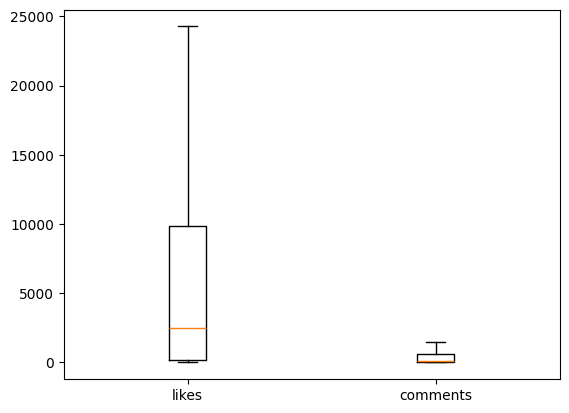

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.boxplot([videos['likeCount'].dropna(),videos['commentCount'].dropna()],showfliers=False,labels=['likes','comments'])
plt.savefig('comlikes.pdf',format='pdf')
plt.show()

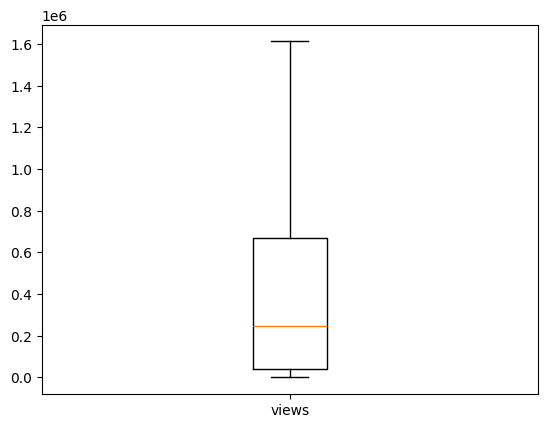

In [23]:
plt.boxplot([videos['viewCount'].dropna()],showfliers=False,labels=['views'])
plt.savefig('views.pdf',format='pdf')
plt.show()

In [24]:
channels_per_cat = pd.merge(channels,videos[['channelId','category']],left_on='id',right_on='channelId')

In [25]:
channels_per_cat = channels_per_cat.drop_duplicates(subset='id')

In [26]:
channels_per_cat = channels_per_cat[channels_per_cat['category']<30]

In [27]:
channels_per_cat.to_csv('channels_relevant.csv',index=False)